# Task 4

First, update the following cell to have a link to your Homework 1 GitHub repository:

UPDATE THIS LINK:

https://github.com/mwidas/eds220-hwk-1

In this task, make at least 5 commits at moments you think are adequate. We'll look at your repo to check commit history. Err on the side of commenting too much for now to get in the habit.

Add comments for all your code. Err on the side of commenting too much for now.

Comments in each exercise and commits will count towards your grade.

This task covers topics we will see on Wednesday Oct. 11. You might want to wait until after that class to solve it.

## Acknowledgement
This task was adapted from the *Pandas Fundamentals with Earthquake Data* assignment from the e-book [Earth and Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

## About the data

For this task we are going to use simplified data from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/). This dataset is in tabular format and has the following columns:

- time = date and time of event (all events from 2014)
- latitude = decimal degrees [-90,90]
- longitude = decimal degrees [-360,360]
- depth = depth of the event (km)
- mag =  magnitude of event
- id = event identifier
- place = where the event took place
- type = type of event

## 1 

a. Import pandas (always with standard abbreviation!).

b. Use `pd.read_csv()` to import the `earthquake_data.csv` dataset and store it as `raw_eqk` (variable name).

c. Look at the head of the dataframe.

In [2]:
# import pandas using standard nomenclature
import pandas as pd

#import data from data folder and name it raw_eqk
raw_eqk = pd.read_csv("data/earthquake_data.csv")

# look at head of data frame
raw_eqk.head()

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ak11151135,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ci37171541,"10km WNW of Progreso, Mexico",earthquake


## 2
a. Print the shape of the `raw_eqk` dataframe.

b. Print the type of `raw_eqk`'s shape.

c. Print *only* the number of rows by accessing it from `raw_eqk`'s shape. HINT: how do you index an element in a tuple?

In [3]:
# print the shape of the raw_eqk dataframe, 120108 rows and 8 columns
print(raw_eqk.shape)

#print the type of raw_eqk data frame
print(type(raw_eqk))

# print the number of rows using tuple indexing from the shape function
print(raw_eqk.shape[0])

(120108, 8)
<class 'pandas.core.frame.DataFrame'>
120108


## 3

Get the unique values of the type of events.

In [4]:
# use unique() to find unique values within the type column or raw_eqk
raw_eqk.type.unique()

array(['earthquake', 'quarry blast', 'quarry', 'mining explosion',
       'rock burst', 'explosion', 'landslide', 'sonicboom', 'sonic boom',
       'anthropogenic event', 'acoustic noise'], dtype=object)

# 4

a. Select only earthquake events and store them as `eqk` (variable name)

b. Update the index of `eqk` to be the `id` column of the dataframe. 

c. Check the new index by viewing the first 3 rows of `eqk`.

In [5]:
# a, select events with type = earthquake from raw_eqk data frame
eqk = raw_eqk.loc[raw_eqk.type == 'earthquake']
eqk

#b, set index to be the id column of eqk and assign this indexing to the data frame
eqk = eqk.set_index('id')

#c, view the first 3 rows of eqk with new indexing using head()
eqk.head(3)

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,"12km NNW of North Nenana, Alaska",earthquake


# 5

How many events were left out of `raw_eqk` when you selected only earthqake events? 

HINT: There are *many* ways you can get this information. One could be to use (2).

In [10]:
# find the number of events with a type that is not earthquake in our raw_eqk dataset
len(raw_eqk.loc[raw_eqk.type != 'earthquake'])

1710

# 6
Without creating any new variables, plot a histogram of the eartquake's magnitudes (`eqk` data). Add a title and change the color of your graph.

<AxesSubplot:title={'center':'Earthquake Magnitudes'}, ylabel='Frequency'>

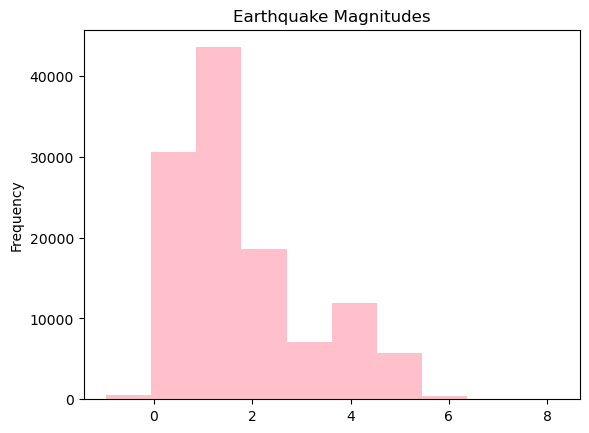

In [13]:
# use plot() function to graph eqarthquake magnitudes and add a graph title and change color of graph to pink
eqk.mag.plot(kind = 'hist',
            title = 'Earthquake Magnitudes',
            color = 'pink')

# 7

a. Create a new variable `top20` with the 20 earthquakes with largest magnitude. HINT: [`pandas.Series.nlargest`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nlargest.html)

b. Create a bar plot showing the magnitude of the top 20 earthquakes. Update the title, x-axis label, y-axis label, and color of the bars. 

c. What is the role of the `top20` index in the graph? What would have happened if we had not updated the index?

<AxesSubplot:title={'center':'Top 20 Earthquakes with the highest magnitude'}, xlabel='Earthquake ID', ylabel='Earthquake Magnitude'>

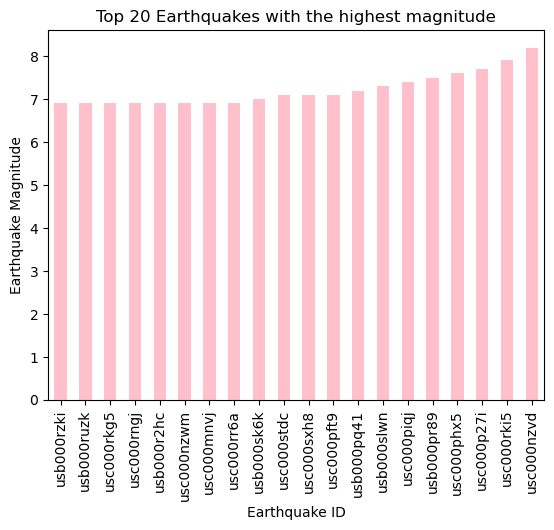

In [12]:
# a, create a variable with the 20 earthquakes with the largest magnitudes 
top20 = eqk.mag.nlargest(20).sort_values()
top20

#b, using the plot() function create a bar plot of top20 showing the magnitude
top20.plot(kind = 'bar',
          title = 'Top 20 Earthquakes with the highest magnitude',
          xlabel = 'Earthquake ID',
          ylabel = 'Earthquake Magnitude',
          color = 'pink')

The role for the `top20` index in the graph is to indicate which variable should be plotted against the magnitude variable. If we had not indexed by `id` we would have a graph that has magnitudes on the y-axis and the numbered-index of our original data set on the x-axis.

# 8 
We are interested in place, magnitude and depth of the top 20 earthquakes with largest magnitude. Select this data from the `eqk` data frame.

HINT: This is a "select rows and columns simultaneously" from `eqk` exercise. To select the rows you could use the index of `top20`.

In [ ]:
# use loc() to select the index rows of the top20 and the place, mag, and depth columns within eqk
eqk_select = eqk.loc[top20.index, ['place', 'mag', 'depth']]
eqk_select

# 9 

Without creating any new variables, visualize the locations of eartquakes with magnitude greater than 5 by creating a scatter plot of their latitude and longitude. Make the following adjustments to the basic plot:
- update the title
- color the points by magnitude (HINT: [check the `c` parameter here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html))
- adjust the `alpha` (transparency) argument
- adjust the `colormap` argument to maket it look prettier. [Click for ideas of sequential colormaps.](https://matplotlib.org/stable/users/explain/colors/colormaps.html)


<AxesSubplot:title={'center':'Locations of Earthquakes with Magnitude greater than 5'}, xlabel='longitude', ylabel='latitude'>

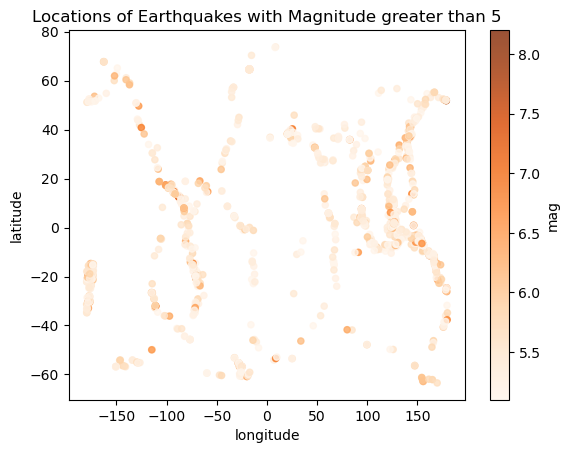

In [11]:
# filter data to only show where mag > 5, and then our lat and long columns
# create a scatterplot with different customizations like, color, alpha, and title, and color points using the magnitude column sequentially
eqk.loc[eqk.mag > 5, ['latitude', 'longitude', 'mag']].plot(kind='scatter',
         x = 'longitude',
         y = 'latitude',
          title = 'Locations of Earthquakes with Magnitude greater than 5',
          c = 'mag',
          colormap='Oranges',
         alpha = 0.8)